[View in Colaboratory](https://colab.research.google.com/github/GoicoJ/HelloWorld/blob/master/Signals_Filters_Frequency.ipynb)

# Frequency domain, Filters & Signal mixing
in this notebook we introduce the concepts of signal mixing

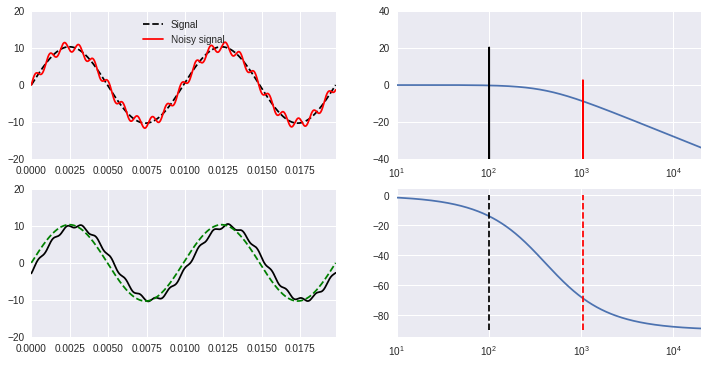

In [74]:
#@title Bode & filters { run: "auto" }
f_cutoff = 410 #@param {type:"slider", min:20, max:1000, step:10}
f_signal = 101 #@param {type:"slider", min:1, max:500, step:10}
A_signal = 10.3 #@param {type:"slider", min:0, max:15, step:0.1}
f_noise = 1050 #@param {type:"slider", min:20, max:2000, step:10}
A_noise = 1.35 #@param {type:"slider", min:0.05, max:5, step:0.05}



from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special


# time base in seconds
t_sim=1
T_sample=1e-6
t = np.arange(0, t_sim, T_sample)

# create the signals
noise=A_noise*np.sin(2*np.pi*f_noise*t)
señal=A_signal*np.sin(2*np.pi*f_signal*t)
noisy_signal=señal+noise

#Calculate the FFT
scale=2.0/t.size
Fourier_sign=scale*np.absolute(np.fft.rfft(señal))
Fourier_noise=scale*np.absolute(np.fft.rfft(noise))
Fourier_noisy=scale*np.absolute(np.fft.rfft(noisy_signal))
Fourier_dB=20*np.log10(Fourier_sign)
Fourier_noise_dB=20*np.log10(Fourier_noise)
Fourier_noisy_dB=20*np.log10(Fourier_noisy)
n = señal.size
freq = np.fft.rfftfreq(n, T_sample)

#bode of the filter
pulsacion=np.logspace(1,4,num=1000)
s1 = signal.lti([1], [1/f_cutoff, 1])
freq, mag, phase = signal.bode(s1,freq)

#operation in the frequency domain
Vout_signal=Fourier_dB+mag
Vout_noise=Fourier_noise_dB+mag
Vout_noisy_dB=Fourier_noisy_dB+mag
#Vout_noisy=Vout_noisy_dB
Vout_noisy=10**(Vout_noisy_dB/20)
Vout_phase=(-90+phase)/360
Vout_phase=Vout_phase*2*np.pi
Xf_new = Vout_noisy*np.exp(1j*Vout_phase);
Vout_time = (1/scale)*np.fft.irfft(Xf_new);

fig, axes = plt.subplots(2,2)
fig.set_size_inches(12, 6)
axes[0, 0].plot(t,señal,'k--',label='Signal')
axes[0, 0].plot(t,noisy_signal,'r',label='Noisy signal')
axes[0, 0].set_xlim([0,2/f_signal])
legend = axes[0, 0].legend(loc='upper center', shadow=True, fontsize='small')
axes[0, 0].set_ylim([-20,20])
axes[0, 1].semilogx(freq, mag)    # Bode magnitude plot
axes[0, 1].semilogx(freq,Fourier_dB,'k')
axes[0, 1].semilogx(freq,Fourier_noise_dB,'r')
axes[0, 1].set_xlim([10,2e4])
axes[0, 1].set_ylim([-40,40])
axes[1, 1].semilogx(freq, phase)  # Bode phase plot
axes[1, 1].semilogx([f_signal,f_signal],[-90,0],'k--')
axes[1, 1].semilogx([f_noise,f_noise],[-90,0],'r--')
axes[1, 1].set_xlim([10,2e4])
axes[1, 0].plot(t,(Vout_time),'k')
axes[1, 0].plot(t,señal,'g--')
axes[1, 0].set_xlim([0,2/f_signal])
axes[1, 0].set_ylim([-20,20])
plt.show()

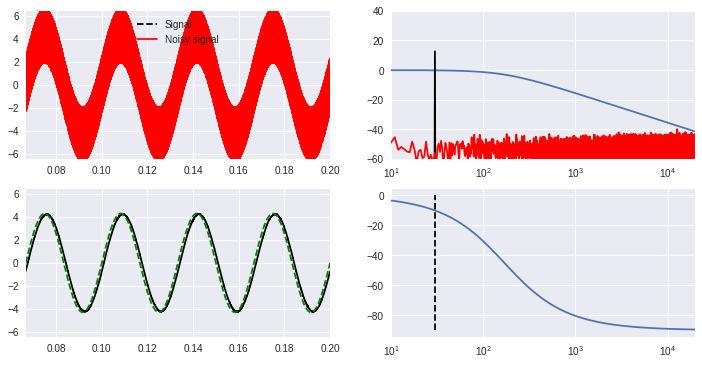

In [75]:
#@title Bode & filters with white noise { run: "auto" }
f_cutoff = 170 #@param {type:"slider", min:20, max:500, step:10}
f_signal = 30 #@param {type:"slider", min:20, max:500, step:10}
A_signal = 4.3 #@param {type:"slider", min:0, max:15, step:0.1}
A_noise = 4.75 #@param {type:"slider", min:0.05, max:5, step:0.05}



from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special


# time base in seconds
t_sim=1
T_sample=1e-6
t = np.arange(0, t_sim, T_sample)

# create the signals with white noise
noise=A_noise*(np.random.random_sample((t.size))-0.5)
señal=A_signal*np.sin(2*np.pi*f_signal*t)
noisy_signal=señal+noise

#Calculate the FFT
scale=2.0/t.size
Fourier_sign=scale*np.absolute(np.fft.rfft(señal))
Fourier_noise=scale*np.absolute(np.fft.rfft(noise))
Fourier_noisy=scale*np.absolute(np.fft.rfft(noisy_signal))
Fourier_dB=20*np.log10(Fourier_sign)
Fourier_noise_dB=20*np.log10(Fourier_noise)
Fourier_noisy_dB=20*np.log10(Fourier_noisy)
n = señal.size
freq = np.fft.rfftfreq(n, T_sample)

#bode of the filter
pulsacion=np.logspace(1,4,num=1000)
s1 = signal.lti([1], [1/f_cutoff, 1])
freq, mag, phase = signal.bode(s1,freq)

#operation in the frequency domain
Vout_signal=Fourier_dB+mag
Vout_noise=Fourier_noise_dB+mag
Vout_noisy_dB=Fourier_noisy_dB+mag
#Vout_noisy=Vout_noisy_dB
Vout_noisy=10**(Vout_noisy_dB/20)
Vout_phase=(-90+phase)/360
Vout_phase=Vout_phase*2*np.pi
Xf_new = Vout_noisy*np.exp(1j*Vout_phase);
Vout_time = (1/scale)*np.fft.irfft(Xf_new);

fig, axes = plt.subplots(2,2)
fig.set_size_inches(12, 6)
axes[0, 0].plot(t,señal,'k--',label='Signal')
axes[0, 0].plot(t,noisy_signal,'r',label='Noisy signal')
axes[0, 0].set_xlim([2/f_signal,6/f_signal])
legend = axes[0, 0].legend(loc='upper center', shadow=True, fontsize='small')
axes[0, 0].set_ylim([-1.5*A_signal,1.5*A_signal])
axes[0, 1].semilogx(freq, mag)    # Bode magnitude plot
axes[0, 1].semilogx(freq,Fourier_dB,'k')
axes[0, 1].semilogx(freq,Fourier_noise_dB,'r')
axes[0, 1].set_xlim([10,2e4])
axes[0, 1].set_ylim([-60,40])
axes[1, 1].semilogx(freq, phase)  # Bode phase plot
axes[1, 1].semilogx([f_signal,f_signal],[-90,0],'k--')
axes[1, 1].set_xlim([10,2e4])
axes[1, 0].plot(t,(Vout_time),'k')
axes[1, 0].plot(t,señal,'g--')
axes[1, 0].set_xlim([2/f_signal,6/f_signal])
axes[1, 0].set_ylim([-1.5*A_signal,1.5*A_signal])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power


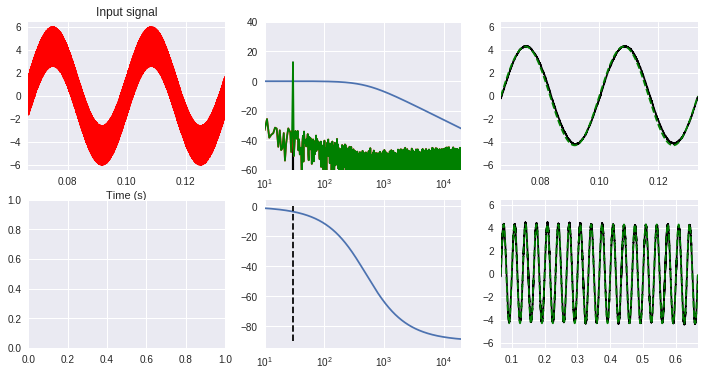

In [29]:
#@title Bode & filters with pink noise { run: "auto" }
f_cutoff = 500 #@param {type:"slider", min:20, max:500, step:10}
f_signal = 30 #@param {type:"slider", min:20, max:500, step:10}
A_signal = 4.3 #@param {type:"slider", min:0, max:15, step:0.1}
A_noise = 3.4 #@param {type:"slider", min:0.05, max:5, step:0.05}



from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

#definition of the 1/f pink noise shaping in the freq domain
def one_over_f(f, knee, alpha):
    desc = np.ones_like(f)
    desc[f<knee] = np.abs((f[f<knee]/knee)**(-alpha))
    desc[0] = 1
    return desc


# time base in seconds
t_sim=1
T_sample=1e-6
t = np.arange(0, t_sim, T_sample)

# create the signals with white noise
noise=A_noise*(np.random.random_sample((t.size))-0.5)
señal=A_signal*np.sin(2*np.pi*f_signal*t)
noisy_signal=señal+noise

#Calculate the FFT
n = señal.size
freq = np.fft.rfftfreq(n, T_sample)
scale=2.0/t.size
Fourier_sign=scale*np.absolute(np.fft.rfft(señal))
Fourier_noise=scale*np.absolute(np.fft.rfft(noise))
#white noise shaped in the freq domain to get pink noise
Fourier_noise_pink=Fourier_noise*one_over_f(freq,500,0.7)
Fourier_noise_pink_dB=20*np.log10(Fourier_noise_pink)
Fourier_noisy=Fourier_sign+Fourier_noise_pink
Fourier_dB=20*np.log10(Fourier_sign)
Fourier_noise_dB=20*np.log10(Fourier_noise)
Fourier_noisy_dB=20*np.log10(Fourier_noisy)

#bode of the filter
pulsacion=np.logspace(1,4,num=1000)
s1 = signal.lti([1], [1/f_cutoff, 1])
freq, mag, phase = signal.bode(s1,freq)

#operation in the frequency domain
Vout_signal=Fourier_dB+mag
Vout_noise=Fourier_noise_dB+mag
Vout_noisy_dB=Fourier_noisy_dB+mag
#Vout_noisy=Vout_noisy_dB
Vout_noisy=10**(Vout_noisy_dB/20)
Vout_phase=(-90+phase)/360
Vout_phase=Vout_phase*2*np.pi
Xf_new = Vout_noisy*np.exp(1j*Vout_phase);
Vout_time = (1/scale)*np.fft.irfft(Xf_new);

fig, axes = plt.subplots(2,3)
fig.set_size_inches(12, 6)
axes[0, 0].plot(t,señal,'k--',label='Signal')
axes[0, 0].plot(t,noisy_signal,'r',label='Noisy signal')
axes[0, 0].set_xlim([2/f_signal,4/f_signal])
axes[0, 0].set_title("Input signal")
axes[0, 0].set_xlabel("Time (s)")
#legend = axes[0, 0].legend(loc='upper center', shadow=True, fontsize='small')
axes[0, 0].set_ylim([-1.5*A_signal,1.5*A_signal])
axes[0, 1].semilogx(freq, mag)    # Bode magnitude plot
axes[0, 1].semilogx(freq,Fourier_dB,'k')
axes[0, 1].semilogx(freq,Fourier_noise_pink_dB,'r')
axes[0, 1].semilogx(freq,Fourier_noisy_dB,'g')
axes[0, 1].set_xlim([10,2e4])
axes[0, 1].set_ylim([-60,40])
axes[1, 1].semilogx(freq, phase)  # Bode phase plot
axes[1, 1].semilogx([f_signal,f_signal],[-90,0],'k--')
axes[1, 1].set_xlim([10,2e4])
axes[0, 2].plot(t,(Vout_time),'k')
axes[0, 2].plot(t,señal,'g--')
axes[0, 2].set_xlim([2/f_signal,4/f_signal])
axes[0, 2].set_ylim([-1.5*A_signal,1.5*A_signal])
axes[1, 2].plot(t,(Vout_time),'k')
axes[1, 2].plot(t,señal,'g--')
axes[1, 2].set_xlim([2/f_signal,20/f_signal])
axes[1, 2].set_ylim([-1.5*A_signal,1.5*A_signal])
plt.show()

In [0]:
#Uploading the Dataset 
from google.colab import files
uploaded = files.upload()
#Save uploaded file on the Virtual Machine's 
#Thanks to user3800642 from StackOverflow 

with open("ecg.txtv", 'w') as f:
    f.write(uploaded[uploaded.keys()[0]])


In [0]:
pandas.read_csv(URL)

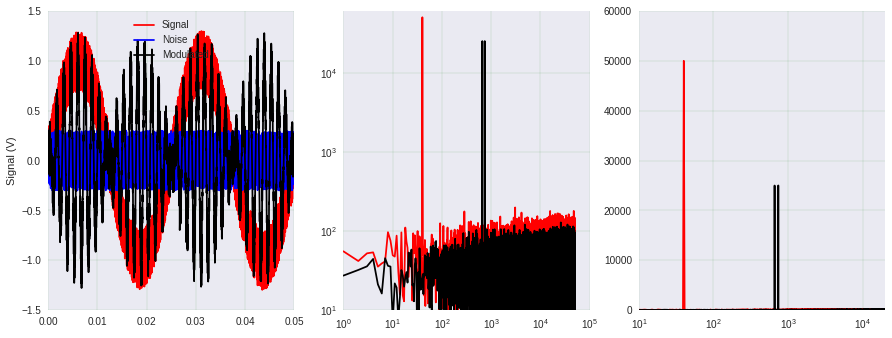

In [4]:
#@title Signal mixing (Amplitude modulation) { run: "auto" }

f_signal = 40 #@param {type:"slider", min:20, max:500, step:10}
A_signal = 1 #@param {type:"slider", min:0, max:1, step:0.1}
f_mod = 1600 #@param {type:"slider", min:100, max:10000, step:100}
A_noise = 0.6 #@param {type:"slider", min:0, max:1, step:0.05}

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

# time base in seconds
t_sim=1
T_sample=1e-5
t = np.arange(0, t_sim, T_sample)

# create the signal
noise=A_noise*(np.random.random_sample((t.size))-0.5)
signal=A_signal*np.sin(2*np.pi*f_signal*t) + noise
signal_mod= signal * np.sin(2*np.pi*f_mod*t)

#Calculate the FFT
Fourier_sign=np.absolute(np.fft.rfft(signal))
Fourier_mod=np.absolute(np.fft.rfft(signal_mod))
n = signal.size
sample_rate = 100
freq = np.fft.rfftfreq(n, T_sample)

# Create axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 5.5)
ax1.grid(color='g', linestyle='-', linewidth=0.1)
ax1.set_ylabel('Signal (V)')
ax1.plot(t, signal, color='r',label='Signal')
ax1.plot(t, noise, color='b',label='Noise')
ax1.plot(t, signal_mod, color='k',label='Modulated')
legend = ax1.legend(loc='upper center', shadow=True, fontsize='small')
ax1.set_xlim([0,2/f_signal])
ax1.set_ylim([-1.5,1.5])
ax2.loglog(freq, Fourier_sign, color='r')
ax2.loglog(freq, Fourier_mod, color='k')
ax2.grid(color='g', linestyle='-', linewidth=0.1)
ax2.set_xlim([1,1e5])
ax2.set_ylim([10,1.2*np.amax(Fourier_sign)])
ax3.semilogx(freq, Fourier_sign, color='r')
ax3.semilogx(freq, Fourier_mod, color='k')
ax3.grid(color='g', linestyle='-', linewidth=0.1)
ax3.set_xlim([10,2e4])
ax3.set_ylim([10,1.2*np.amax(Fourier_sign)])
plt.show()



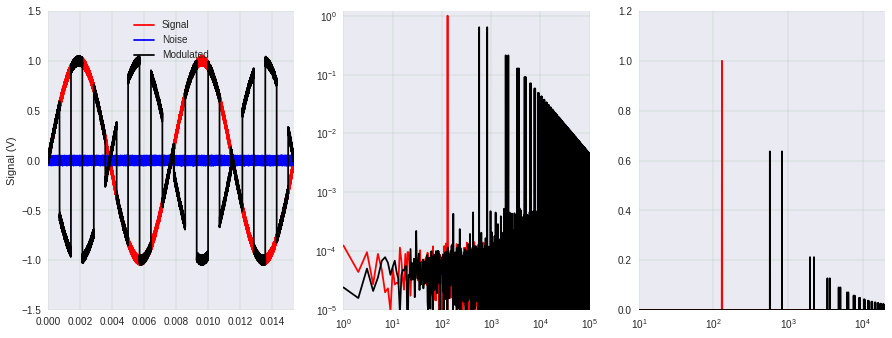

In [47]:
#@title Signal mixing (Chopping) { run: "auto" }

A_signal = 1 #@param {type:"slider", min:0, max:1, step:0.1}
f_signal = 130 #@param {type:"slider", min:20, max:500, step:10}
f_mod = 700 #@param {type:"slider", min:100, max:10000, step:100}
A_noise = 0.1 #@param {type:"slider", min:0, max:1, step:0.05}

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy import signal

# time base in seconds
t_sim=1
T_sample=1e-6
t = np.arange(0, t_sim, T_sample)

# create the signal
noise=A_noise*(np.random.random_sample((t.size))-0.5)
señal=A_signal*np.sin(2*np.pi*f_signal*t) + noise
Chopper=signal.square(2*np.pi*f_mod*t)
signal_mod= señal * Chopper

#Calculate the FFT
scale=2.0/t.size
Fourier_sign=scale*np.absolute(np.fft.rfft(señal))
Fourier_mod=scale*np.absolute(np.fft.rfft(signal_mod))
n = señal.size
freq = np.fft.rfftfreq(n, T_sample)

# Create axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 5.5)
ax1.grid(color='g', linestyle='-', linewidth=0.1)
ax1.set_ylabel('Signal (V)')
ax1.plot(t, señal, color='r',label='Signal')
ax1.plot(t, noise, color='b',label='Noise')
ax1.plot(t, signal_mod, color='k',label='Modulated')
legend = ax1.legend(loc='upper center', shadow=True, fontsize='small')
ax1.set_xlim([0,2/f_signal])
ax1.set_ylim([-1.5,1.5])
ax2.loglog(freq, Fourier_sign, color='r')
ax2.loglog(freq, Fourier_mod, color='k')
ax2.grid(color='g', linestyle='-', linewidth=0.1)
ax2.set_xlim([1,1e5])
ax2.set_ylim([1e-5,1.2*np.amax(Fourier_sign)])
ax3.semilogx(freq, Fourier_sign, color='r')
ax3.semilogx(freq, Fourier_mod, color='k')
ax3.grid(color='g', linestyle='-', linewidth=0.1)
ax3.set_xlim([10,2e4])
ax3.set_ylim([1e-6,1.2*np.amax(Fourier_sign)])
plt.show()



In [0]:
zip?
